In [1]:
#in His Name

# اضافه کردن کتاب‌خانه‌های مورد نیاز

در صورتیکه کتاب‌خانه‌ها را تاکنون نصب نکرده‌اید، به کمک دستورات زیر این کتاب‌خانه‌ها را اضافه نمایید

In [3]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install datetime
!pip install tqdm
!pip install sklearn

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ابتدا فایل
`notifications.csv`
که همراه با این نوت‌بوک دانلود کرده‌اید را به وسیله‌ی کتابخانه
`pandas`
می‌خوانیم

In [114]:
interactions = pd.read_csv('notifications.csv')

در این مرحله به کمک کتاب‌خانه `datetime` پیش‌پردازش لازم را روی داده انجام داده و ستون های جدیدی به آن اضافه می‌کنید. 

In [115]:
stime = "01/06/2019"
time_origin = datetime.strptime(stime, "%d/%m/%Y").timestamp()

In [116]:
interactions['interaction_time_absolute'] = interactions['interaction_time'].map(lambda x : datetime.fromtimestamp(time_origin + int(x)))

In [117]:
interactions

,action,application_id,interaction_time,notification_id,user_id,interaction_time_absolute
0,F,1,4489200,79,665,2019-07-22 23:00:00
1,F,1,4489200,79,6280,2019-07-22 23:00:00
2,F,1,4388400,78,14774,2019-07-21 19:00:00
3,F,1,4410000,78,3152,2019-07-22 01:00:00
4,C,1,4410000,72,3633,2019-07-22 01:00:00
...,...,...,...,...,...,...
140723,F,0,993600,13,14760,2019-06-12 12:00:00
140724,F,0,928800,13,2096,2019-06-11 18:00:00
140725,F,0,900000,13,11308,2019-06-11 10:00:00
140726,F,0,885600,13,5975,2019-06-11 06:00:00


 در این قسمت در تابع نگاشت باید از روی ورودی ساعت آن‌را استخراج کنید 

In [118]:
interactions['interaction_hour'] = interactions['interaction_time_absolute'].map(lambda x : x.hour)

 در این قسمت در تابع نگاشت باید از روی ورودی روز هفته آن‌را استخراج کنید 
حواستان باشد که روز هفته ای را که تابع مربوطه در کتابخانه `datetime` به عنوان خروجی می‌دهد برای هفته‌ای که با   شنبه آغاز می‌شود معتبر نیست :) 

In [123]:
interactions['interaction_dow'] = interactions['interaction_time_absolute'].map(lambda x : ((x.weekday())))

# کار کردن با `interaction_hour` 

 با توابع `groupby` و `agg` می‌توانید داده را بر اساس متغیرهای مختلف گروه‌بندی کرده و روی نتیجه آن توابع مختلفی اعمال نمایید.

In [125]:
actions = interactions.groupby(['action', 'interaction_hour']).agg({'action':'count'})

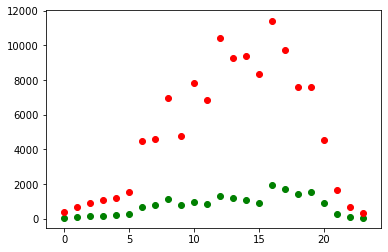

In [126]:
notifs_clicked = np.array(actions.loc['C']['action'].values)
notifs_failed = np.array(actions.loc['F']['action'].values)
notifs_count = notifs_clicked + notifs_failed
plt.scatter(range(24), notifs_clicked, c='g')
plt.scatter(range(24), notifs_failed, c='r')

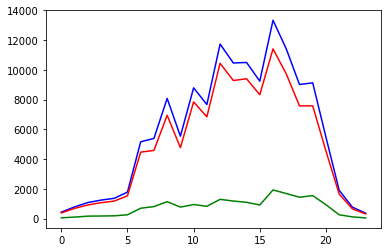

In [127]:
plt.plot(notifs_count, c='b')
plt.plot(notifs_clicked, c='g')
plt.plot(notifs_failed, c='r')
plt.show()

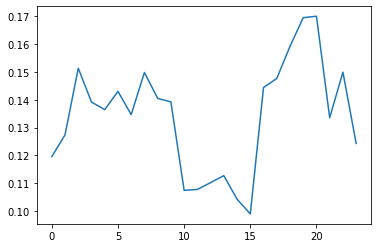

In [128]:
hit_rate = notifs_clicked / (notifs_clicked + notifs_failed)
plt.plot(hit_rate)
plt.show()

ستونی با نام `hour_hit_rate` به داده اضافه می‌کنید که نشان‌دهنده‌ی درصد موفقیت اعلان‌هایی است که در آن ساعت فرستاده شده‌اند.

In [129]:
interactions['hour_hit_rate'] = interactions['interaction_hour'].map(lambda x : hit_rate[x])

# کار کردن با `interaction_dow` 

 با توابع `groupby` و `agg`  داده را بر اساس متغیرهای `action` و `interaction_dow` گروه‌بندی کرده و تعداد هر دسته را بشمارید.

In [130]:
actions = interactions.groupby(['action','interaction_dow']).agg({'action':'count'})

مانند قسمت قبل اعلان‌های موفق و ناموفق را برای هر روز هفته استخراج کرده و نمودارهای مربوطه را رسم نمایید.

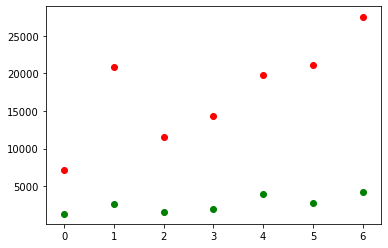

In [131]:
notifs_clicked = np.array(actions.loc['C']['action'].values)
notifs_failed = np.array(actions.loc['F']['action'].values)
notifs_count = notifs_clicked + notifs_failed
plt.scatter(range(7),notifs_clicked,c='g')
plt.scatter(range(7),notifs_failed,c='r')

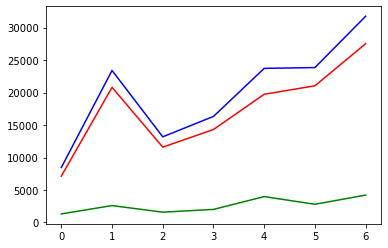

In [132]:
plt.plot(notifs_count, 'b')
plt.plot(notifs_clicked, c='g')
plt.plot(notifs_failed, c='r')
plt.show()

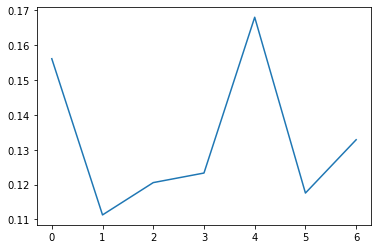

In [133]:
hit_rate = notifs_clicked / (notifs_clicked + notifs_failed)
plt.plot(hit_rate)
plt.show()

ستونی با نام `dow_hit_rate` به داده اضافه می‌کنید که نشان‌دهنده‌ی درصد موفقیت اعلان‌هایی است که در آن روز از هفته فرستاده شده‌اند.

In [134]:
interactions['dow_hit_rate'] = interactions['interaction_dow'].map(lambda x : hit_rate[x])

# کار کردن با `application_id` 

 با توابع `groupby` و `agg`  داده را بر اساس متغیرهای `action` و `application_id` گروه‌بندی کرده و تعداد هر دسته را بشمارید.

In [135]:
actions = interactions.groupby(['action', 'application_id']).agg({'action':'count'})

In [136]:
notifs_clicked = np.array(actions.loc['C']['action'].values)
notifs_failed = np.array(actions.loc['F']['action'].values)
notifs_count = notifs_clicked + notifs_failed

In [137]:
hit_rate = notifs_clicked / (notifs_clicked + notifs_failed)

ستونی با نام `app_id_hit_rate` به داده اضافه می‌کنید که نشان‌دهنده‌ی درصد موفقیت اعلان‌هایی است که از طرف آن برنامه فرستاده شده‌اند.

In [138]:
interactions['app_id_hit_rate'] = interactions['application_id'].map(lambda x : hit_rate[x])

# محاسبه درصد موفقیت اعلان‌هایی که به هر کاربر فرستاده شده‌اند

به کمک اعمال تابع `numpy.unique` روی `interactions['user_id']`، .اعضای آن‌را یکتا می‌کنیم 

In [139]:
user_ids = np.unique(interactions['user_id'])

تابع `get_user_id_hit_rate` شناسه کاربر را به عنوان ورودی دریافت کرده و درصد موفقیت اعلان‌هایی که به این کاربر فرستاده شده را به عنوان خروجی باز می‌گرداند.
مثلا اگر کاربری با شناسه کاربری `user_id` صد اعلان دریافت کرده و روی پنجاه تا کلیک کرده است، این تابع عدد `0.5`را به عنوان خروجی باز می‌گرداند.

In [151]:
x = interactions[interactions['user_id']==6280]
actions=x.groupby(['action']).agg({'action':'count'})
try:
    clicked = actions.loc['C']['action']
except KeyError:
    clicked = 0
try:
    failed =  actions.loc['F']['action']
except KeyError:
    failed = 0
print(failed,clicked)
clicked/(clicked+failed)

49 3


0.057692307692307696

In [146]:
def get_user_id_hit_rate(user_id):
    x = interactions[interactions['user_id']==user_id]
    actions=x.groupby(['action']).agg({'action':'count'})
    try:
        clicked = actions.loc['C']['action']
    except KeyError:
        clicked = 0
    try:
        failed =  actions.loc['F']['action']
    except KeyError:
        failed = 0
            
    total = failed + clicked
    return (clicked / total)


کتاب‌خانه `tqdm` برای نشان دادن درصد پیشرفت حلقه به کار می‌رود.

In [147]:
user_id_hit_rate = {}
for user_id in tqdm(user_ids):
    user_id_hit_rate[user_id] = get_user_id_hit_rate(user_id)

100%|███████████████████████████████████████████████████████████████████████████| 14233/14233 [00:52<00:00, 270.36it/s]


ستونی با نام `user_id_hit_rate` به داده اضافه می‌کنید که نشان‌دهنده‌ی درصد موفقیت اعلان‌هایی است که برای کاربر این اعلان، فرستاده شده است.

In [153]:
interactions['user_id_hit_rate'] = interactions['user_id'].map(lambda user_id : user_id_hit_rate[user_id])

In [154]:
interactions

,action,application_id,interaction_time,notification_id,user_id,interaction_time_absolute,interaction_hour,interaction_dow,hour_hit_rate,dow_hit_rate,app_id_hit_rate,user_id_hit_rate
0,F,1,4489200,79,665,2019-07-22 23:00:00,23,0,0.124309,0.156102,0.185299,0.000000
1,F,1,4489200,79,6280,2019-07-22 23:00:00,23,0,0.124309,0.156102,0.185299,0.057692
2,F,1,4388400,78,14774,2019-07-21 19:00:00,19,6,0.169532,0.132857,0.185299,0.074074
3,F,1,4410000,78,3152,2019-07-22 01:00:00,1,0,0.127389,0.156102,0.185299,0.000000
4,C,1,4410000,72,3633,2019-07-22 01:00:00,1,0,0.127389,0.156102,0.185299,0.297872
...,...,...,...,...,...,...,...,...,...,...,...,...
140723,F,0,993600,13,14760,2019-06-12 12:00:00,12,2,0.110212,0.120555,0.110793,0.000000
140724,F,0,928800,13,2096,2019-06-11 18:00:00,18,1,0.159202,0.111282,0.110793,0.000000
140725,F,0,900000,13,11308,2019-06-11 10:00:00,10,1,0.107435,0.111282,0.110793,0.000000
140726,F,0,885600,13,5975,2019-06-11 06:00:00,6,1,0.134675,0.111282,0.110793,0.083333


# کاهش بعد

In [155]:
x = interactions[['hour_hit_rate', 'dow_hit_rate', 'app_id_hit_rate', 'user_id_hit_rate']]

In [109]:
x

,hour_hit_rate,dow_hit_rate,app_id_hit_rate,user_id_hit_rate
0,0.124309,0.156102,0.185299,0.000000
1,0.124309,0.156102,0.185299,0.057692
2,0.169532,0.132857,0.185299,0.074074
3,0.127389,0.156102,0.185299,0.000000
4,0.127389,0.156102,0.185299,0.297872
...,...,...,...,...
140723,0.110212,0.120555,0.110793,0.000000
140724,0.159202,0.111282,0.110793,0.000000
140725,0.107435,0.111282,0.110793,0.000000
140726,0.134675,0.111282,0.110793,0.083333


ویژگی `action` را به کمک تابع `lambda` از فضای C, F به فضای صفر و یک بنگارید.
یعنی

- C -> 1
- F -> 0

In [158]:
y = interactions['action'].map(lambda action:1 if(action =='C') else 0)

ابتدا به کمک تابع `StandardScaler` ورودی را normal کرده و سپس به کمک تابع `PCA` آن‌را به دو متغیر، کاهش بعد دهید.  

نکته مهم:

این دو ورودی تابع `PCA` را با این مقادیر تنظیم کنید.
```python 
svd_solver = 'full'
random_state = 0
```

In [162]:
x_std = StandardScaler().fit_transform(x)
pca = PCA(n_components=2,svd_solver ='full', random_state =0)
x_pca = pca.fit_transform(x_std)

In [163]:
x_pca

array([[ 0.83354461, -0.92177316],
       [ 0.95560805, -0.68299933],
       [ 1.62382409, -0.44640804],
       ...,
       [-1.63069132,  0.24856689],
       [-0.7715322 ,  0.27465326],
       [-1.38476667,  0.56096229]])

حال با رسم نمودار مشاهده کنید که فرایند طی شده چقدر در جداسازی دو دسته از داده موفق بوده است. در ادامه دوره می‌توانید با روش‌های مختلف دسته‌بندی، داده را دسته‌بندی کنید:)

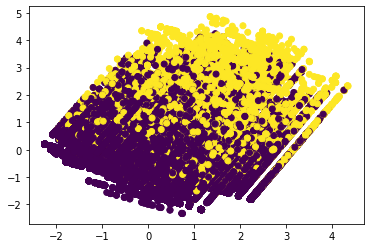

In [164]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)

با این دستور `x_pca` را ذخیره کنید تا با ارزیابی آن از این مرحله عبور کنید.

In [165]:
np.save('x_pca.npy', x_pca)